In [204]:
#Importing all required libraries
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

#read csv file and select only required columns
df = pd.read_csv('/Users/divyapisal/Downloads/Compustat 1990-2014.csv', 
            index_col= ['tic'], 
            parse_dates =['fyear'], 
            header = 0,   
            usecols = ['fyear','tic', 'dltt', 'oancf', 'ta'])


### Calculating Debt ratio and Cash flow volatility

To measure the cash flow volatility I have selected the operating casn flows (oancf) instead of earnings before income tax because:
1. EBIT is not a standard matrix according to GAAP.
2. EBIT fails to account for alternative approaches in capital expenditures, hence might give an inflated value for cash flows.

In [218]:
#Calculations of required matrices
df['debt_ratio'] = df['dltt']/df['ta']
df['debt_ratio'] = df.groupby(['tic'])['debt_ratio'].mean()
df['cf_volatility'] = df.groupby('tic')['oancf'].std()

#Data cleaning
df.replace(["NaN", 'NaT', np.inf], np.nan, inplace = True)
df = df.dropna()
data = df[['debt_ratio','cf_volatility']]
data = data[~data.index.duplicated(keep = 'first')]

### Correlation matrix

There are two key components of a correlation value:

1. magnitude – The larger the magnitude (closer to 1 or -1), the stronger the correlation
2. sign – If negative, there is an inverse correlation. If positive, there is a regular correlation.

In [202]:
#Correlation method used is Pearson
data.corr(method='pearson')

,debt_ratio,cf_volatility
debt_ratio,1.000000,-0.003394
cf_volatility,-0.003394,1.000000


The correlation matrix indicates that correlation coefficient between the debt ratio and volatility of cash flows is close to neither -1 nor 1, which means that there is little to no correlation between the debt and the cash flow volatility

**Scatter plot**

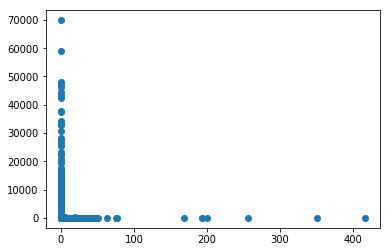

In [198]:
plt.scatter(data['debt_ratio'], data['cf_volatility'])
plt.show()

The scatter plot indicates that there is no relationship between the debt ratio and the cash flow volatility as indicated by the correlation matrix

**Correlation plot**

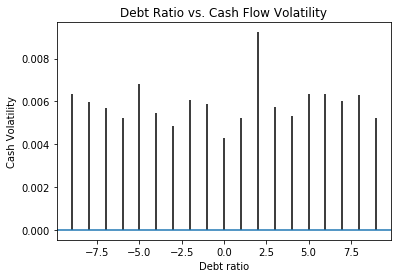

In [220]:
plt.xcorr(data['debt_ratio'], data['cf_volatility'], maxlags=9, usevlines=True)
plt.title('Debt Ratio vs. Cash Flow Volatility')
plt.xlabel('Debt ratio')
plt.ylabel('Cash Volatility')    
plt.show()

The correlation plot too fails to show any relationship between the debt ratio and the cash flow volatility

**Line Plot**

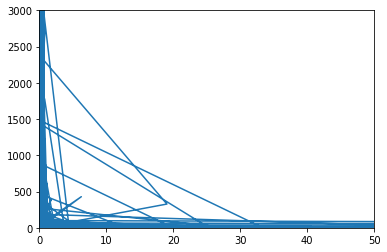

In [222]:
plt.plot(data['debt_ratio'],data['cf_volatility'])
plt.xlim(0,50)
plt.ylim(0,3000)
plt.show()

This plot too shows that the there is no directly proportional relationship between cash flow volatility and the debt of a firm.

# Conclusion

The hypothesis, "the greater a firm's debt, the greater it's volatility of cash flows" is hence proved wrong using the correlation matrix as well as different forms of data visualizations.